In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

os.chdir("C:\\Users\\lucac\\Documents\\GitHub\\song-cluster")

# load the data
exploration_data = pd.read_csv('data/analysis_data/exploration_data.csv')
classifier_data = pd.read_csv('data/analysis_data/classifier_data.csv')

In [25]:
exploration_data.shape[0]

49598

C:\Users\lucac\AppData\Local\Temp\ipykernel_7948\1530418142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exploration_data, x='genre_top', order=exploration_data['genre_top'].value_counts().index, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

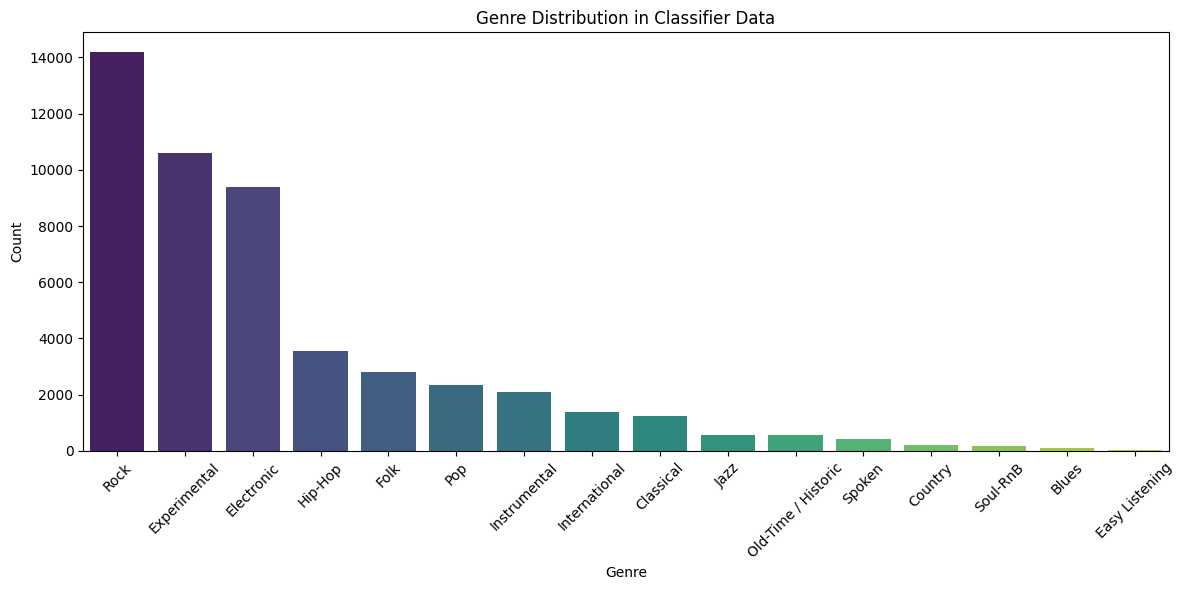

In [20]:
# Visualize genre distribution in classifier data
plt.figure(figsize=(12, 6))
sns.countplot(data=exploration_data, x='genre_top', order=exploration_data['genre_top'].value_counts().index, palette='viridis')
plt.title('Genre Distribution in Classifier Data')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [ ]:
# Count of songs per genre
genre_counts = exploration_data['genre_top'].value_counts()
print(genre_counts)

genre_top
Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: count, dtype: int64


Rock seems to be very overrepresented in the dataset, which might cause problems with the biasing. 

Some solutions:

Undersampling (throwing data away)

    Pros: Simple; keeps training time down.

    Cons: You’ll lose thousands of samples from Rock/Experimental/Electronic, potentially throwing away useful variation (e.g. sub-styles within Rock).

Oversampling (duplicating or synthetic samples)

    Pros: You keep every Rock sample and bring up the small classes.

    Cons: Simple duplication can overfit. SMOTE (synthetic minority oversampling) is more robust but adds training cost (and you only have ~3 hrs).

Class-weighting (preferred)

    Both SVM (via class_weight='balanced') and RandomForest (class_weight='balanced_subsample' or 'balanced') in scikit-learn let you train on the full dataset while penalizing mistakes on rare classes more heavily.

    Pros: Retains all data; minimal extra compute.

    Cons: Less direct control over exact class ratios.

In [21]:
classifier_data

,track_id,title,artist_name,genre_top,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,...,mfcc_13,mfcc_14,mfcc_15,mfcc_16,centroid_mean,centroid_variance,rolloff_mean,rolloff_variance,zcr_mean,zcr_variance
0,58763,"Bach Organ Works: Fantasias and Fugues, Toccat...",James Kibbie,Classical,-379.086578,191.633835,9.320975,13.600589,18.252958,10.154294,...,-2.250628,-0.172125,1.279266,-0.499845,503.211365,41556.392698,807.192383,2.088232e+05,0.029344,0.000197
1,58919,Bach Organ Works: Individual Chorale Preludes,James Kibbie,Classical,-420.224670,214.494446,26.585762,11.209013,13.420013,6.028018,...,-2.083527,-1.868325,-1.177435,-2.933284,371.317078,43889.310171,589.811707,2.157838e+05,0.022080,0.000077
2,32044,Preparing the Past,Aaron Siegel,Classical,-287.898865,245.902756,20.889330,-22.098793,6.212823,-8.524072,...,-0.254352,-0.954961,-6.544041,-6.568994,392.719452,10746.709232,590.232483,5.633719e+04,0.027914,0.000033
3,58767,Bach Organ Works: Other Free Works,James Kibbie,Classical,-326.457977,208.470840,-20.049604,9.267406,3.287401,6.548729,...,-4.013754,-3.696121,1.107749,-3.092274,591.644836,47787.563755,1056.673950,2.788572e+05,0.039371,0.000224
4,139063,"Voice, Clarinet, Fortepiano","Alavedra, McColl, Levine",Classical,-431.620178,144.766342,25.384720,0.175763,6.769419,7.404738,...,-5.680696,-5.705394,-2.253997,-1.116900,652.640076,140438.385924,1046.113281,8.858006e+05,0.030623,0.000292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,122678,Kaos O Labo (Piece of Wood),Salmo,Rock,-206.080933,188.244705,-18.629435,43.904137,18.084715,8.115468,...,0.030422,1.132906,-1.735472,-2.286716,797.616333,420142.287702,1645.774414,1.672616e+06,0.030539,0.002128
4996,56194,Zellrasen,Zellrasen,Rock,-171.143723,129.105804,-29.835461,50.256462,2.384866,22.285662,...,-3.586563,-0.445513,-4.249429,0.050650,1422.880981,383482.430543,2939.113770,1.717852e+06,0.066404,0.002170
4997,60736,Mexican Holiday live at the Winston,Mexican Holiday,Rock,-142.967438,174.351410,-61.835255,18.434099,1.105129,22.256989,...,-8.903422,-1.345746,0.617119,5.750310,1130.015015,39269.225470,1867.028442,1.327426e+05,0.066835,0.000159
4998,12405,Live at WFMU on Scott McDowell's Show on 10/8/...,Takka Takka,Rock,-252.240601,150.367493,-3.678231,29.178551,17.441380,13.956100,...,-1.919412,-1.759369,-6.530976,-1.665794,1049.840576,482807.752088,2253.354004,2.969116e+06,0.036336,0.000677


In [22]:
genre_counts = classifier_data['genre_top'].value_counts()
print(genre_counts)

genre_top
Classical        500
Electronic       500
Experimental     500
Folk             500
Hip-Hop          500
Instrumental     500
International    500
Jazz             500
Pop              500
Rock             500
Name: count, dtype: int64
